In [1]:
import numpy as np
import math
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from nmf import *

ModuleNotFoundError: No module named 'nmf'

In [4]:
a=fetch_olivetti_faces()

In [5]:
a.images.shape[0]

400

In [6]:
c=np.array(a['data'])
c.shape
c=c.T
c.shape

(4096, 400)

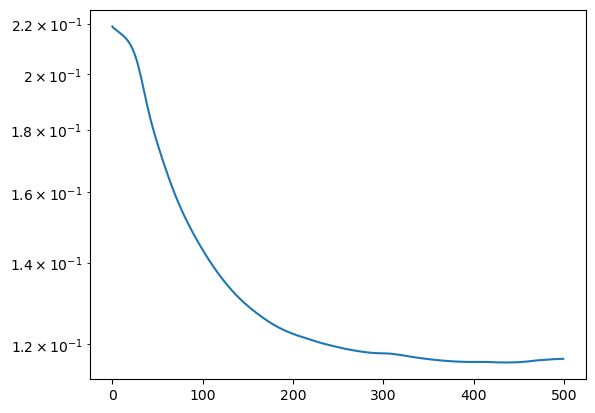

In [26]:
b=NMF(br_komp=50,br_iter=500)
b.Bayes(c,2)
plt.semilogy(b.residuali)

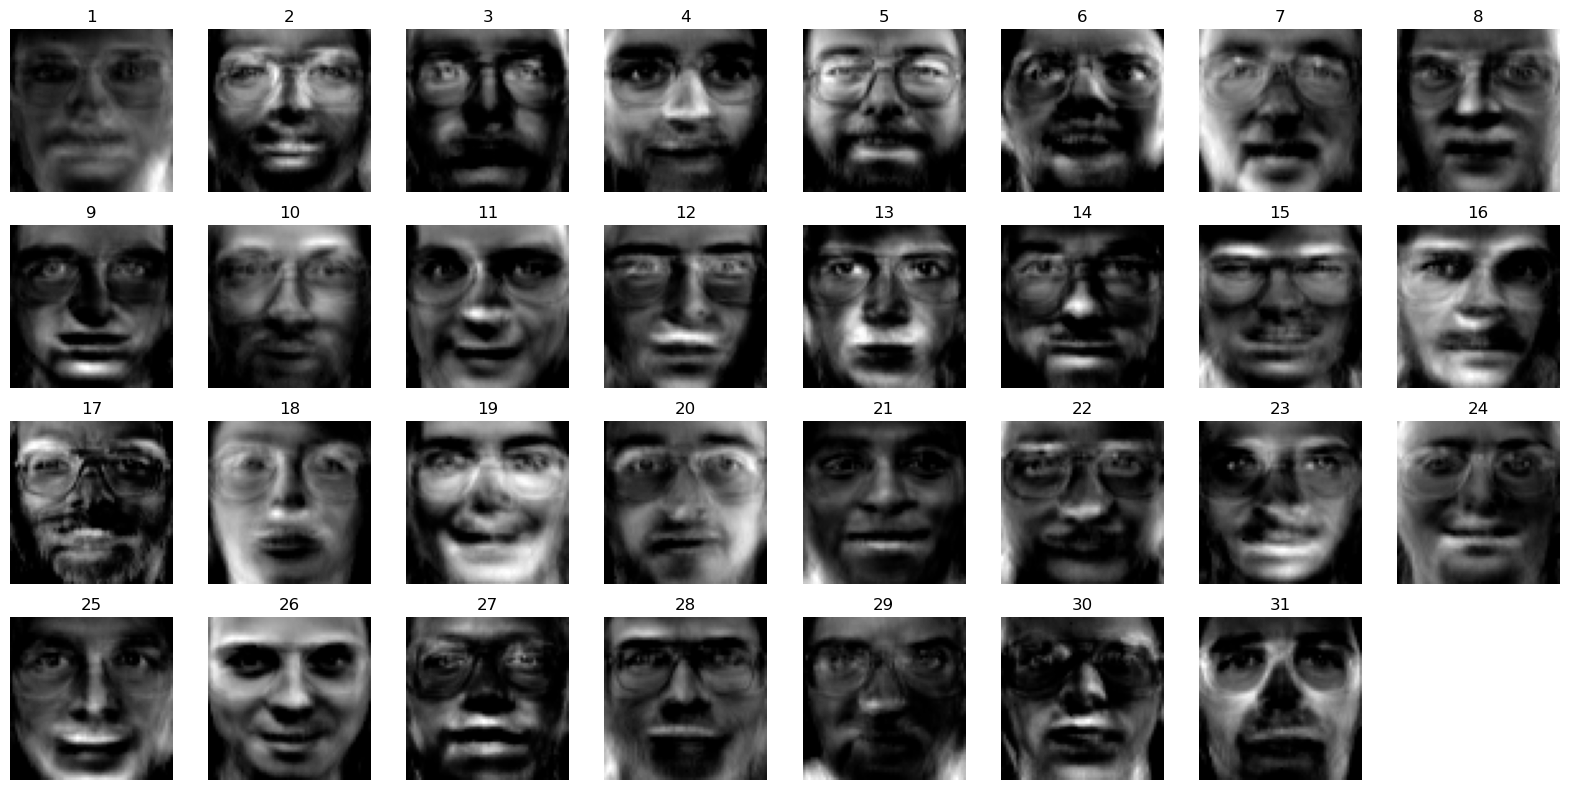

In [27]:
visina, sirina = a.images.shape[1], a.images.shape[2]
br_komp = b.W.shape[1]
n_red = 4
n_stupac = math.ceil(br_komp / n_red)

plt.figure(figsize=(n_stupac * 2, n_red * 2))

for i in range(br_komp):
    plt.subplot(n_red, n_stupac, i + 1)
    plt.imshow(b.W[:, i].reshape(visina, sirina), cmap='gray')
    plt.axis('off')
    plt.title(f'{i+1}')
plt.tight_layout()
plt.show()


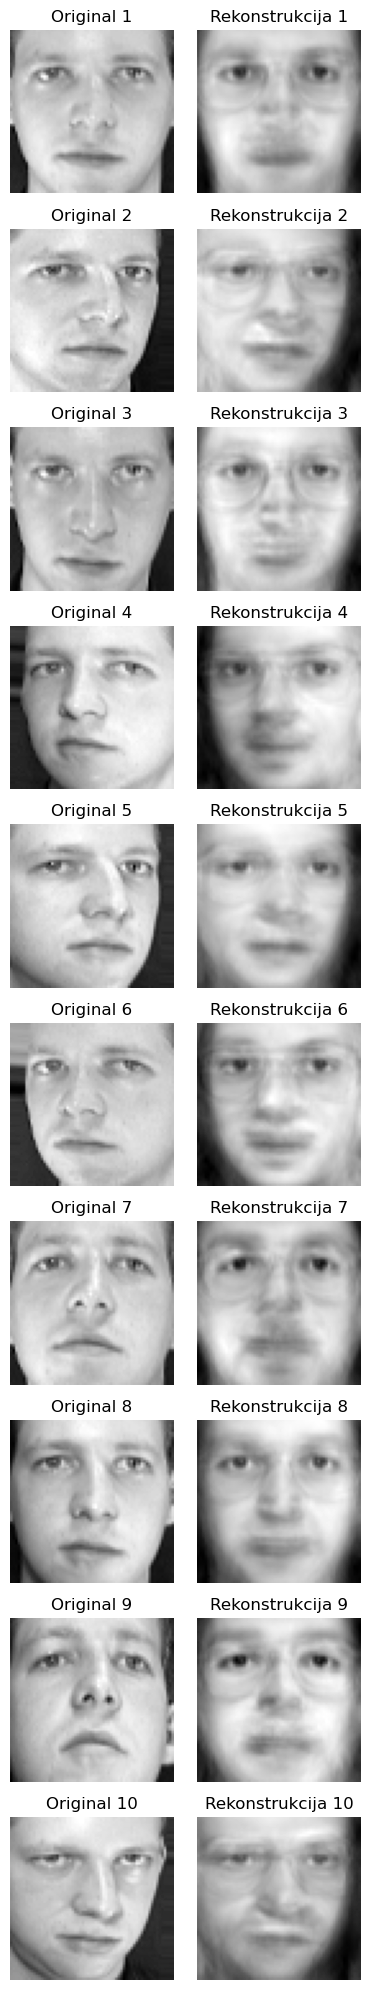

In [42]:
images = a.images     
data = a.data          
reconstructed = (b.W @ b.H)  
reconstructed=reconstructed.T
reconstructed = reconstructed.reshape(-1,64, 64)


fig, axes = plt.subplots(10, 2, figsize=(4, 20))

for i in range(10):
    # original
    axes[i, 0].imshow(images[i], cmap='gray')
    axes[i, 0].set_title(f"Original {i+1}")
    axes[i, 0].axis('off')

    # rekonstrukcija
    axes[i, 1].imshow(reconstructed[i], cmap='gray')
    axes[i, 1].set_title(f"Rekonstrukcija {i+1}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show() 

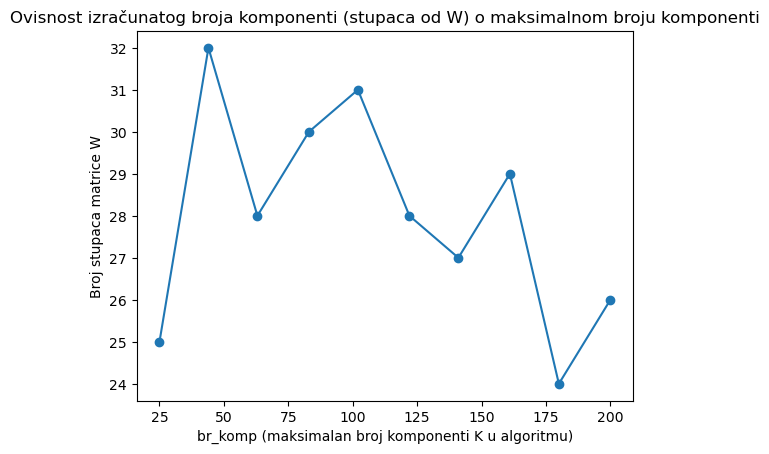

In [43]:
#Ovisnost izračunatog broja komponenti (stupaca od W) o maksimalnom broju komponenti
#Ovaj kod se izvršava par minuta
komponente = np.linspace(25, 200, 10, dtype=int)

broj_stupaca_W = []

for k in komponente:
    model = NMF(br_komp=k, br_iter=500)
    model.Bayes(c, 2)       
    broj_stupaca_W.append(model.W.shape[1])

plt.plot(komponente, broj_stupaca_W, marker='o')
plt.xlabel("br_komp (maksimalan broj komponenti K u algoritmu)")
plt.ylabel("Broj stupaca matrice W")
plt.title("Ovisnost izračunatog broja komponenti (stupaca od W) o maksimalnom broju komponenti")
plt.grid(False)
plt.show()


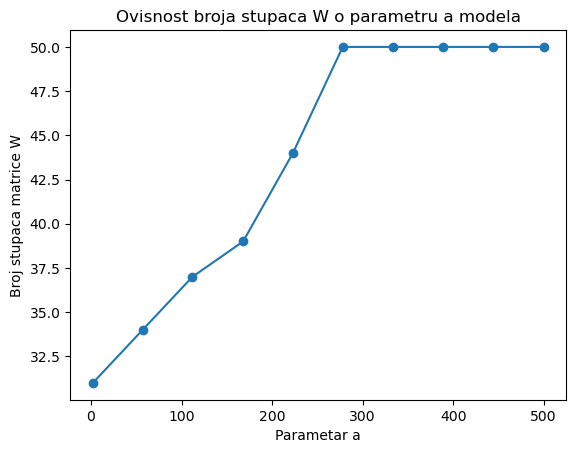

In [44]:
#Ovisnost broja stupaca W o parametru a modela
#Ovaj kod se izvršava par minuta
bayes_parametri = np.linspace(2, 500, 10, dtype=int)

broj_stupaca_W = []

for p in bayes_parametri:
    model = NMF(br_komp=50, br_iter=500)
    model.Bayes(c, p)          
    broj_stupaca_W.append(model.W.shape[1])

plt.plot(bayes_parametri, broj_stupaca_W, marker='o')
plt.xlabel("Parametar a")
plt.ylabel("Broj stupaca matrice W")
plt.title("Ovisnost broja stupaca W o parametru a modela")
plt.grid(False)
plt.show()

